## План занятия
* Оптимизаторы
* Функции активации
* Нормализация
* Подбор гиперпараметров
* Системы логирования



In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets


## Оптимизаторы


Что такое оптимизатор? Вспомним, что у нас есть loss функция, и чем она меньше, тем лучше работает наша модель. То есть нам надо минимизировать ее. Грубо говоря, оптимизатор, это такой алгоритм, который берет на себя всю работу по изменению параметров модели, чтобы минимизировать loss.

Существует множество алгоритмов оптимизации. В нашем уроке нет особого смысла рассматривать их все. Список реализованных в PyTorch оптимизаторов можно посмотреть [здесь](https://pytorch.org/docs/stable/optim.html). 
В интернете существует множество описаний того, как работают оптимизаторы. 

Могу смело рекомендовать цикл видео на канале [3blue1brown](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) про нейронные сети и в частности про [градиентный спуск](https://youtu.be/IHZwWFHWa-w).

Еще можно почитать статьи на хабре, например, [эту](https://habr.com/ru/company/prequel/blog/568496/).

А вот [эту](https://habr.com/ru/post/318970/) очень-очень рекомендую!

Очень полезно будет почитать также записи к лекции курса [cs231n](https://cs231n.github.io/neural-networks-3/).

Давайте рассмотрим несколько самых популярных оптимизаторов:

* [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)
* [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam)
* [RMSprop](https://pytorch.org/docs/stable/generated/torch.optim.RMSprop.html#torch.optim.RMSprop)



### SGD (Stochastic Gradient Descent)

Сам по себе стохастический градиентный спуск является очень простым алгоритмом.

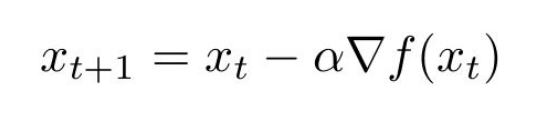

Мы можем записать это в коде следующим образом:

```python
while True:
    dx = compute_grad(x)
    x = x - lr * dx

```

Давайте посмотрим, как это выглядит в pytorch. Давайте возьмем какую-нибудь функцию, выберем начальное положение и попробуем погулять по этому рельефу при помощи градиентного спуска.

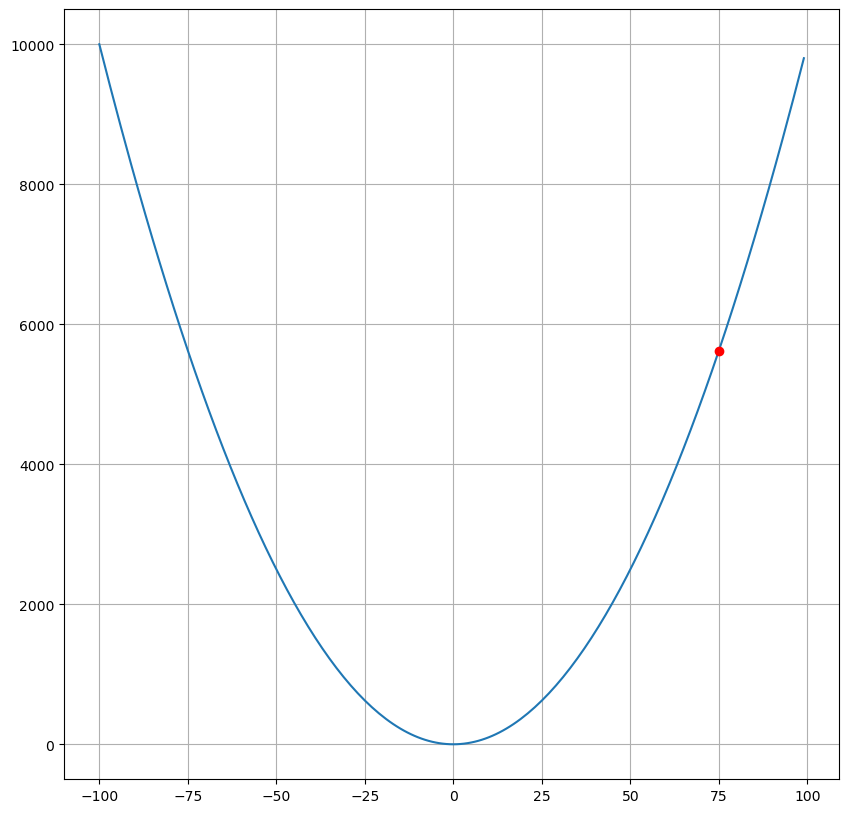

In [9]:
# define parabola
def f(x):
    return x ** 2

# generate x and f(x)
x = np.arange(-100, 100, 1)
y = f(x)

# define start position
x_pos = 75
y_pos = f(x_pos)

# plot results
plt.figure(figsize=(10, 10))
plt.plot(x,y)
plt.grid()
plt.plot(x_pos, y_pos, 'ro')

plt.show()

Выберем начальное положение и посмотрим, куда нам надо двигаться:

In [10]:
def df(x):
    return 2 * x

dx = df(x_pos)
print(dx)

150


Для того, чтобы нам сделать шаг оптимизации, нам необходимо пойти в сторону, противоположную направлению производной (градиенту в многомерном случае). При этом нам надо умножить его на `learning rate`.

/tmp/ipykernel_7078/3911769227.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(new_x_pos, new_y_pos, 'ro', color='blue')


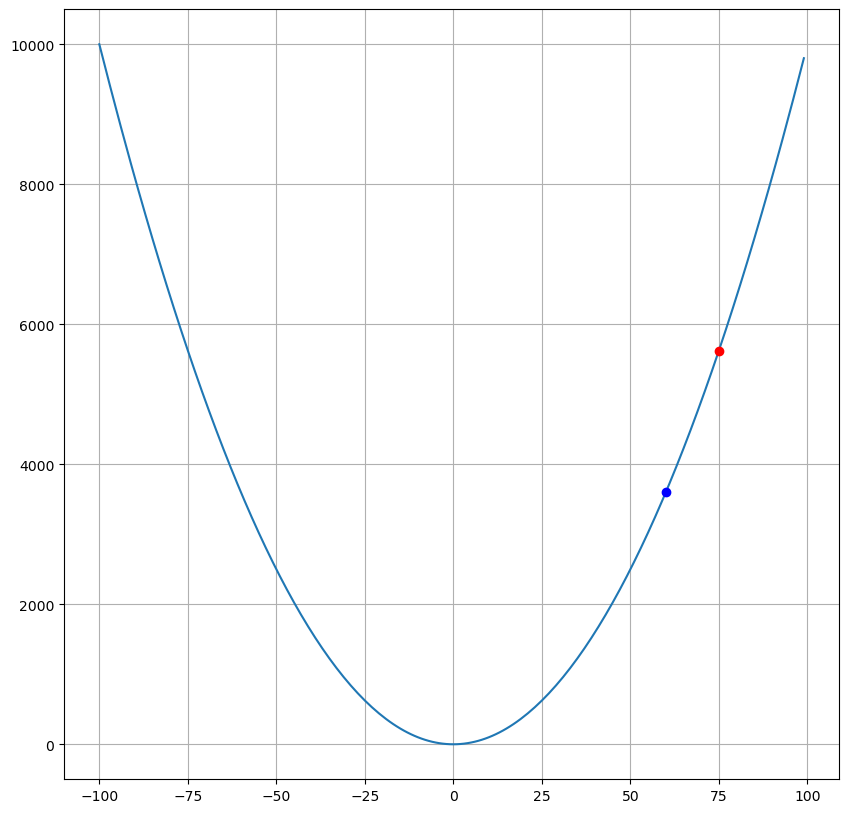

In [11]:
# define learning rate
learning_rate = 0.1

# calculate new x  position with help of gradient decent
new_x_pos = x_pos - learning_rate * dx 

# calculate new y position just for draw
new_y_pos = f(new_x_pos)

# plot results
plt.figure(figsize=(10, 10))
plt.plot(x,y)
plt.plot(x_pos, y_pos, 'ro')
plt.plot(new_x_pos, new_y_pos, 'ro', color='blue')
plt.grid()
plt.show()

Мы только что рассмотрели, как мы можем сделать один шаг градиентного спуска для параболы. Но это пока не дает представления о том, как же на самом деле работает алгоритм SGD. Зная вашу любовь к слайдерам, я поднотовил фрагмент кода ниже, где мы можем немного поиграться 
с различными параметрами. Пока что мы можем оперировать только с `learning rate`.
<br>

Кстати, в PyTorch оптимизаторы находятся в модуле [torch.optim](https://pytorch.org/docs/stable/optim.html). Документацию по SGD можно почитать [здесь](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html).

In [20]:
LEARNING_RATE = 1.1
num_of_steps = 200

def f(x):
    return x ** 2

x = np.arange(-100,100,1)

# define torch tensor for optimization
weights = torch.tensor(75, dtype=torch.float32, requires_grad=True)

# define optimizer
optimizer = torch.optim.SGD([weights], lr=LEARNING_RATE, momentum=0)

# calculate y for drawing
y = f(torch.from_numpy(x)).numpy()

# list of historical positions of x and y
x_pos = [weights.item()]
y_pos = [f(weights).item()]

# Calculate positions for given number of steps
for i in range(num_of_steps):
    # Important step to remove old grads
    optimizer.zero_grad()

    # Calculate "loss" function
    res = f(weights)

    # backward step
    res.backward()

    # update weights
    optimizer.step()

    # append new position to lists for drawing
    x_pos.append(weights.item())
    y_pos.append(f(weights).item())


# function for drawing results 
def update_plot(step):
    # init figure
    plt.figure(figsize=(10, 10))
    # plot graph
    plt.plot(x,y)
    # plot points
    plt.plot(x_pos[:step], y_pos[:step], 'o', color='red')
    # plot trace
    plt.plot(x_pos[:step+1], y_pos[:step+1])
    # plot current position
    plt.plot(x_pos[step], y_pos[step], 'o', color='blue')
    plt.grid()
    plt.show()


step = widgets.IntSlider(
    min=0, max=num_of_steps, value=0, description='step:'
    )

widgets.interactive(update_plot, step=step)

interactive(children=(IntSlider(value=0, description='step:', max=200), Output()), _dom_classes=('widget-inter…

Давайте определим функцию поинтереснее, чем парабола:

In [21]:
LEARNING_RATE = 10.5
num_of_steps = 200

def f(x):
    return x * torch.cos(0.1*x)

x = np.arange(-100,100,1)

# define torch tensor for optimization
weights = torch.tensor(55, dtype=torch.float32, requires_grad=True)
# define optimizer
optimizer = torch.optim.SGD([weights], lr=LEARNING_RATE, momentum=0)

# calculate y for drawing
y = f(torch.from_numpy(x)).numpy()

# list of historical positions of x and y
x_pos = [weights.item()]
y_pos = [f(weights).item()]

# Calculate positions for given number of steps
for i in range(num_of_steps):
    # Important step to remove old grads
    optimizer.zero_grad()
    # Calculate "loss" function
    res = f(weights)
    # backward step
    res.backward()
    # update weights
    optimizer.step()

    # append new position to lists for drawing
    x_pos.append(weights.item())
    y_pos.append(f(weights).item())


# function for drawing results 
def update_plot(step):
    # init figure
    plt.figure(figsize=(10, 10))
    # plot graph
    plt.plot(x,y)
    # plot points
    plt.plot(x_pos[:step], y_pos[:step], 'o', color='red')
    # plot trace
    plt.plot(x_pos[:step+1], y_pos[:step+1])
    # plot current position
    plt.plot(x_pos[step], y_pos[step], 'o', color='blue')
    plt.grid()
    plt.show()

step = widgets.IntSlider(
    min=0, max=num_of_steps, value=0, description='step:'
    )

widgets.interactive(update_plot, step=step)

interactive(children=(IntSlider(value=0, description='step:', max=200), Output()), _dom_classes=('widget-inter…

Какие проблемы есть у SGD? <br>
Он не смотрит вообще на то, что было до текущего момента. Куда укажет градиент, туда и прыгнем. Было бы здорово, если бы мы могли запоминать нашу траекторию. Получчается, что если мы довольно долго двигались в одном направлении, то логичнее всего, что мы должны продолжить двигаться в этом же направлении, даже если текущий градиент укажет в другую сторону или окажется нулевым. 

Если раньше у нас была следующая формула:

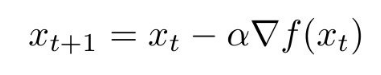

То добавление моментов выглядит так:

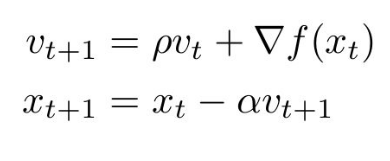

По-сути, мы добавляем скорость как скользящее среднее по предыдущим градиентам. Также мы добавляем небольшое трение $\rho$. Обычно параметро $\rho$ находится в пределах от 0.9 до 0.99. Графически мы можем вычислить это следующим образом:

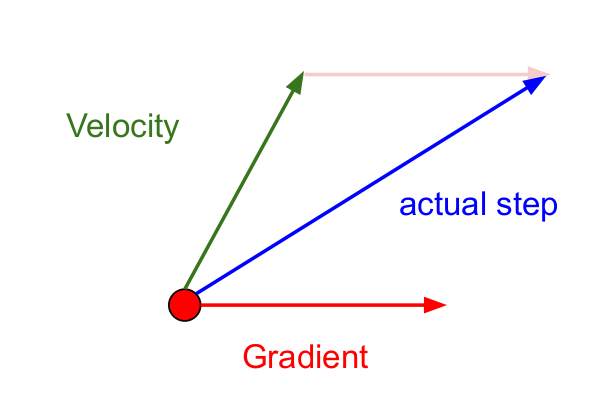

 Давайте поиграемся с ним на нашем интерактивном графике:

In [22]:
LEARNING_RATE = .1
num_of_steps = 200

momentum = 0.99

def f(x):
    return x * torch.cos(0.1*x)

x = np.arange(-100,100,1)


# define torch tensor for optimization
weights = torch.tensor(55, dtype=torch.float32, requires_grad=True)
# define optimizer
optimizer = torch.optim.SGD([weights], lr=LEARNING_RATE, momentum=momentum)


# calculate y for drawing
y = f(torch.from_numpy(x)).numpy()


# list of historical positions of x and y
x_pos = [weights.item()]
y_pos = [f(weights).item()]

# Calculate positions for given number of steps
for i in range(num_of_steps):
    # Important step to remove old grads
    optimizer.zero_grad()
    # Calculate "loss" function
    res = f(weights)
    # backward step
    res.backward()
    # update weights
    optimizer.step()

    # append new position to lists for drawing
    x_pos.append(weights.item())
    y_pos.append(f(weights).item())


# function for drawing results 
def update_plot(step):
    # init figure
    plt.figure(figsize=(10, 10))
    # plot graph
    plt.plot(x,y)
    # plot points
    plt.plot(x_pos[:step], y_pos[:step], 'o', color='red')
    # plot trace
    plt.plot(x_pos[:step+1], y_pos[:step+1])
    # plot current position
    plt.plot(x_pos[step], y_pos[step], 'o', color='blue')
    plt.grid()
    plt.show()


step = widgets.IntSlider(
    min=0, max=num_of_steps, value=0, description='step:'
    )
    
widgets.interactive(update_plot, step=step)

interactive(children=(IntSlider(value=0, description='step:', max=200), Output()), _dom_classes=('widget-inter…

На самом деле, моменты можно вычислять по-разному. Существует очень популярный момент Нестерова или (ускоренный градиент Нестерова). его смысл заключается в том, что мы вычисляем градиент не в текущей точке, а в точке, куда указывает вектор скорости. Результирующим шагом будет все также сумма вектора скорости и вектора градиента.

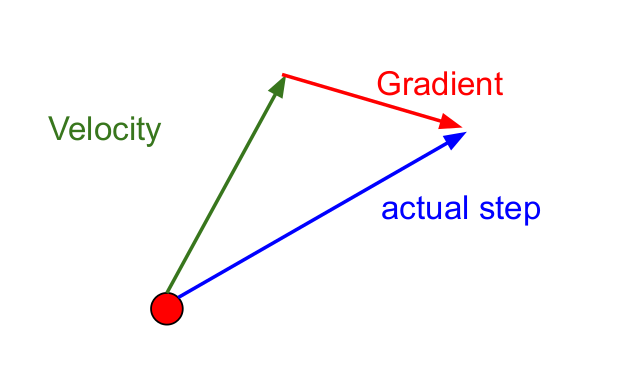

Такое изменение позволяет быстрее «катиться», если в стороне, куда мы направляемся, производная увеличивается, и медленнее, если наоборот.

In [28]:
LEARNING_RATE = 0.01

num_of_steps = 200

momentum = 1.1

def f(x):
    return x * torch.cos(0.1*x)

x = np.arange(-100,100,1)

# define torch tensor for optimization
weights = torch.tensor(55, dtype=torch.float32, requires_grad=True)
# define optimizer
optimizer = torch.optim.SGD(
    [weights], lr=LEARNING_RATE, momentum=momentum, nesterov=True
    )

# calculate y for drawing
y = f(torch.from_numpy(x)).numpy()

# list of historical positions of x and y
x_pos = [weights.item()]
y_pos = [f(weights).item()]

# Calculate positions for given number of steps
for i in range(num_of_steps):
    # Important step to remove old grads
    optimizer.zero_grad()
    # Calculate "loss" function
    res = f(weights)
    # backward step
    res.backward()
    # update weights
    optimizer.step()

    # append new position to lists for drawing
    x_pos.append(weights.item())
    y_pos.append(f(weights).item())

# function for drawing results 
def update_plot(step):
    # init figure
    plt.figure(figsize=(10, 10))
    # plot graph
    plt.plot(x,y)
    # plot points
    plt.plot(x_pos[:step], y_pos[:step], 'o', color='red')
    # plot trace
    plt.plot(x_pos[:step+1], y_pos[:step+1])
    # plot current position
    plt.plot(x_pos[step], y_pos[step], 'o', color='blue')
    plt.grid()
    plt.show()

step = widgets.IntSlider(
    min=0, max=num_of_steps, value=0, description='step:'
    )

widgets.interactive(update_plot, step=step)

interactive(children=(IntSlider(value=0, description='step:', max=200), Output()), _dom_classes=('widget-inter…

### Adagrad

Мы поняли, что накапливать момент/импульсы здорово. Но существуют более замысловатые подходы к обновлению весов.
Допустим, есть признаки, которые встречаются достаточно редко, но при этом могут оказаться довольно информативными. 

Идея Adagrad в том, чтобы использовать что-нибудь, что бы уменьшало обновления для элементов, которые мы и так сильно обновляем.


```python
eps = 1e-7
grad_squared = 0
while True:
    dx = compute_grad(x)
    grad_squared += dx ** 2
    x = x - lr * dx / sqrt(grad_squared + eps)

```

Достоинство Adagrad в отсутствии необходимости точно подбирать learning rate. Достаточно выставить его в меру большым, но не громадным, чтобы алгроритм не расходился. По сути мы получаем learning rate decay.

Недостаток алгоритма в том, что grad_squared может увеличиваться скольк угодно много и может застопорить оптимизацию.

### RMSProp
Мы хотим избавиться от недостатка алгоритма Adagrad. Будем вычислять не квадраты градиентов по всей истории обучания, а брать усреднённый по истории квадрат градиента.

```python
eps = 1e-7
grad_squared = 0
while True:
    dx = compute_grad(x)
    grad_squared += decay_rate * grad_squared + (1 - decay_rate) * dx ** 2
    x = x - lr * dx / sqrt(grad_squared + eps)

```

### Adam

Adam - adaptive moment estimation. По сути алгоритм является сочетанием идеи об использовании моментов/импульсов и идею более слабого обновления весов для типичных признаков. 

```python
first_moment  = 0
second_moment = 0
while True:
    dx = compute_grad(x)
    first_moment = beta_1 * first_moment + (1 - beta_1) * dx
    second_moment = beta_2 * second_moment + (1 - beta_2) * dx * dx

    x = x - lr * first_moment / sqrt(second_moment + eps)
```

In [30]:
LEARNING_RATE = 1.0

num_of_steps = 200

momentum = 1.01

def f(x):
    return x * torch.cos(0.1*x)

x = np.arange(-100,100,1)


# define torch tensor for optimization
weights = torch.tensor(55, dtype=torch.float32, requires_grad=True)
# define optimizer
optimizer = torch.optim.Adam(
    [weights], lr=LEARNING_RATE
    )

# calculate y for drawing
y = f(torch.from_numpy(x)).numpy()

# list of historical positions of x and y
x_pos = [weights.item()]
y_pos = [f(weights).item()]

# Calculate positions for given number of steps
for i in range(num_of_steps):
    # Important step to remove old grads
    optimizer.zero_grad()
    # Calculate "loss" function
    res = f(weights)
    # backward step
    res.backward()
    # update weights
    optimizer.step()

    # append new position to lists for drawing
    x_pos.append(weights.item())
    y_pos.append(f(weights).item())


# function for drawing results 
def update_plot(step):
    # init figure
    plt.figure(figsize=(10, 10))
    # plot graph
    plt.plot(x,y)
    # plot points
    plt.plot(x_pos[:step], y_pos[:step], 'o', color='red')
    # plot trace
    plt.plot(x_pos[:step+1], y_pos[:step+1])
    # plot current position
    plt.plot(x_pos[step], y_pos[step], 'o', color='blue')
    plt.grid()
    plt.show()


step = widgets.IntSlider(
    min=0, max=num_of_steps, value=0, description='step:'
    )

    
widgets.interactive(update_plot, step=step)

interactive(children=(IntSlider(value=0, description='step:', max=200), Output()), _dom_classes=('widget-inter…

### Что делать с learning rate


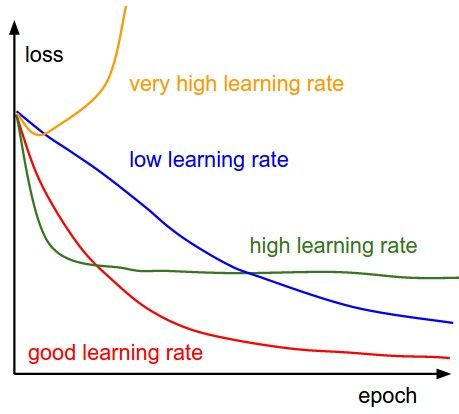

При приближении к некоторому минимуму loss функции нам бы хотелось опуститься как можно ниже. И иногда это сделать можно при помощи так назывваемых `shedulers`. <br>
Идея заключается в том, чтобы менять `learning rate` в соответствии с какой-то стратегией. Почитать про доступные варианты можно [здесь](https://pytorch.org/docs/stable/optim.html).




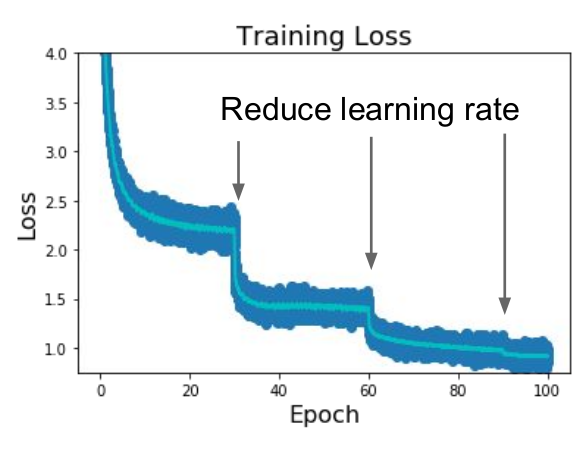

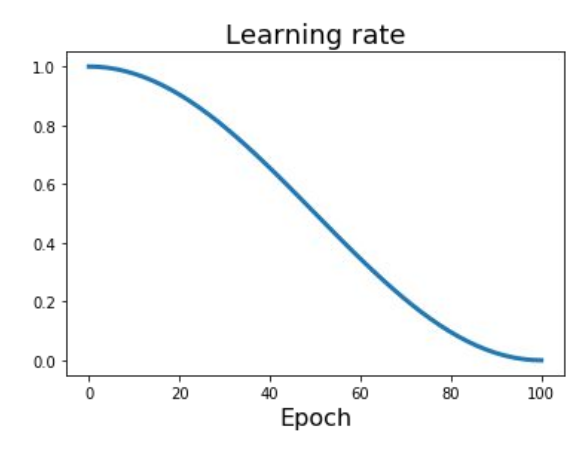

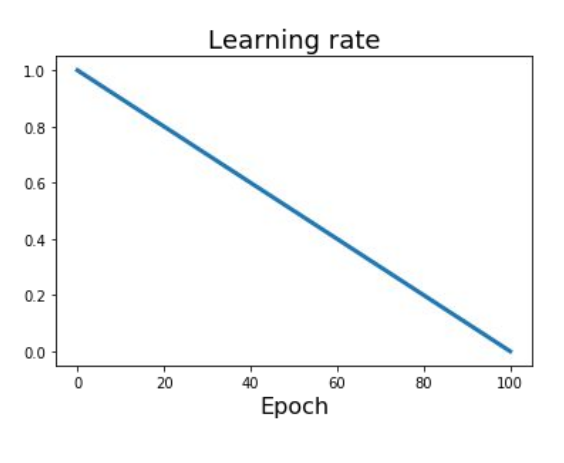

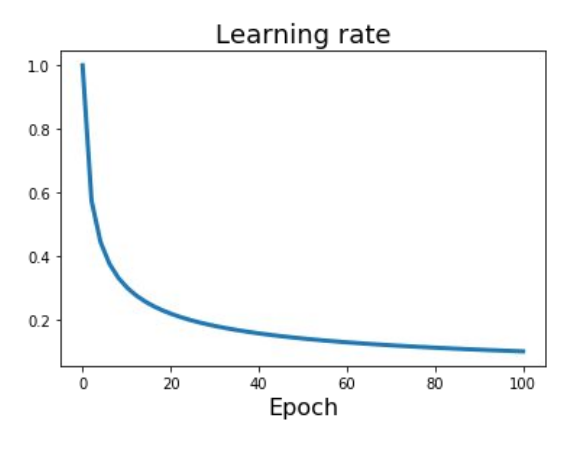

### Резюме

На практике хорошим выбором по дефолту будет Adam. Зачастую он неплохо работает даже без точного подбора learning rate.

Но до сих пор во многих репозиториях можно встретить обученные модели при помощи SGD + Momentum. При этом, конечно, потребуется поперебирать гиперпараметры и воспользоваться LR shedulers (рекомендуется начать с cosine sheduler).

## Функции активации



### Сигмоида

Сигмоида исторически была самой популярной функцией активации.
Преобразует все значения в диапазон от 0 до 1.

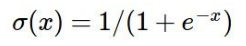

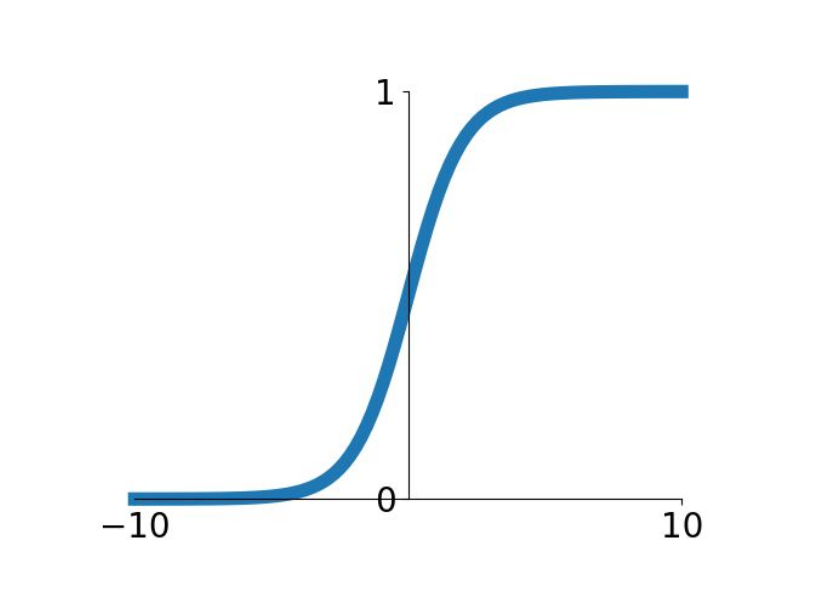

У сигмоиды существует три основных недостатка:
- Насыщенные нейроны будут "убивать" градиенты 
- Сигмоида не центрированна
- Вычислительно затратная функция

### Гиперболический тангенс

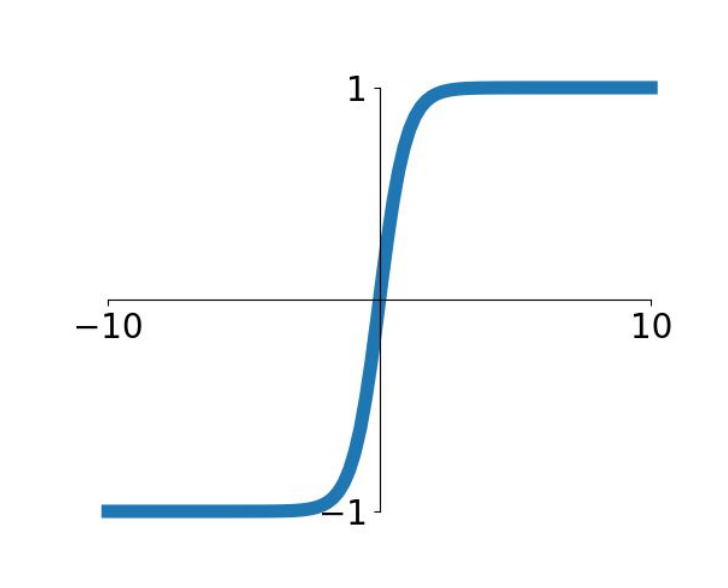

Имеет все те же недостатки, что и сигмоида, за исключением того, что гиперболический тангенс центрирован в нуле.

### ReLU

Это более простая функция, чем предыдущие две. По сути, это обрезанная линейная функция.

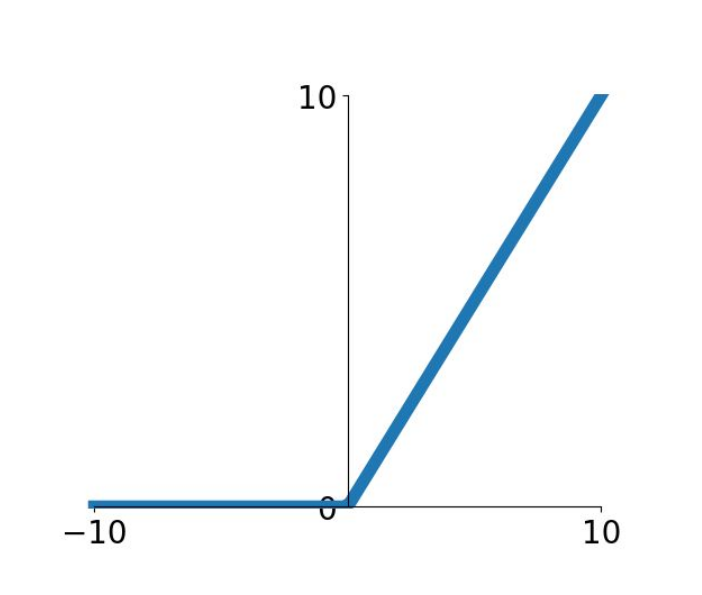

Она обладает следующими плюсами перед сигмоидой и гиперболическим тангенсом:

- Не убивает градиенты (в положительной части)
- Очень проста при вычислениях
- Зачастую позволяет моделе сходиться к минимуму быстрее, чем сигмоида и гиперболический тангенс.

Но также обладает недостатками, основной из которых это так называемый dead ReLu problem. Нейроны с отрицательным выходом будут после ReLU выдавать 0, а это значит, что градиент не будет обратно распространяться, а значит, что веса не будут обновляться.



### Leaky ReLU
Данную проблему решает использование другой линейной функции вместо нуля в ReLU. Теперь у нас градиенты не будут "умирать".

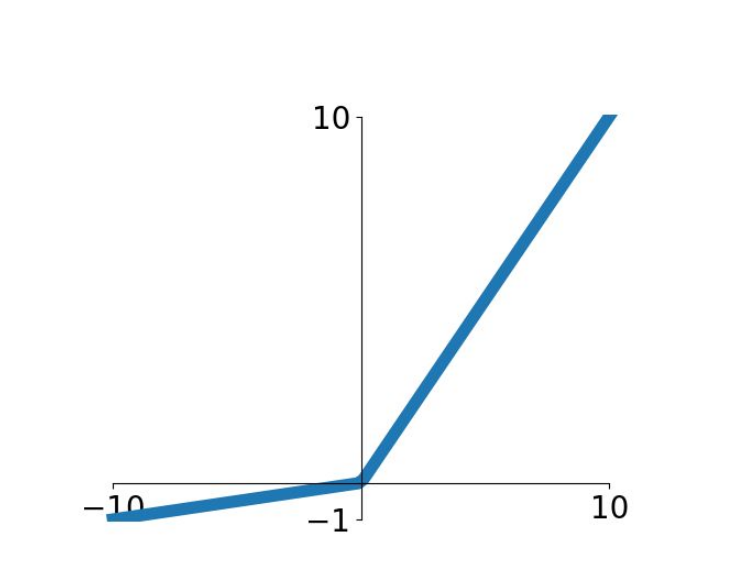

Существуют множество различных функций активации. Многие из них являются некоторым улучшением ReLU. Доступные опции в PyTorch можно посмотреть [здесь](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity).

Общие рекомендации дать сложно, но обычно можно сказать следующее:

- Стоит начать свои эксперименты с ReLU
- Также можно поэкспериментировать с улучшенными версиями ReLU
- По возможности избегать сигмоиду и гиперболический тангенс


## Нормализация данных

Обычной практикой перед обучением моделей является нормализация данных. Самым простым вариантом является центрирование и масштабирование данных:

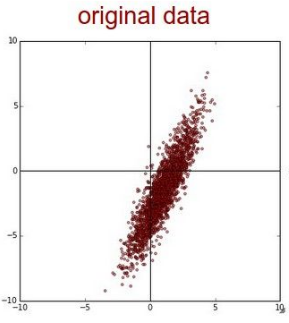

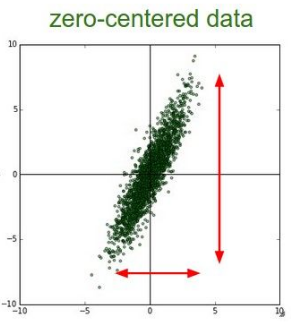

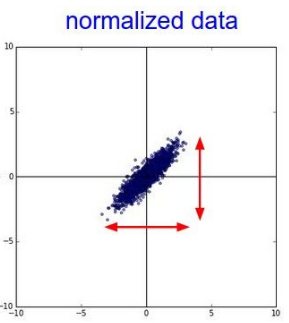

До нормализации данных мы можем иметь следующую картину:

В этом случае лосс будет очень чувствительным к изменения параметров весов, будет сложнее обучать модель.

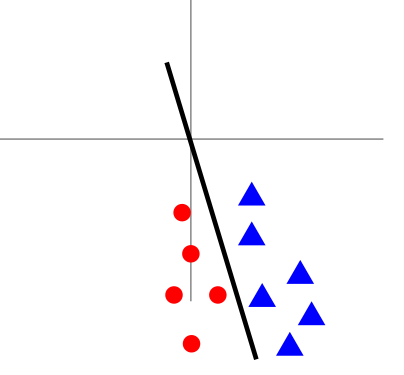

Здесь мы уже не будем так чувствительны к небольшим изменениям весов, легче обучать.

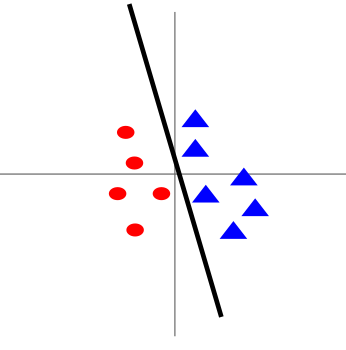

### Слои нормализации

Суть данного метода заключается в том, что некоторым слоям нейронной сети на вход подаются данные, предварительно обработанные и имеющие нулевое математическое ожидание и единичную дисперсию.

Использование нормализации по мини-батчам обладает полезными свойствами:

* достигается более быстрая сходимость моделей, несмотря на выполнение дополнительных вычислений;
* батч нормализация позволяет каждому слою сети обучаться более независимо от других слоев;
* становится возможным использование более высокого темпа обучения, так как пакетная нормализация гарантирует, что выходы узлов нейронной сети не будут иметь слишком больших или малых значений;
* пакетная нормализация в каком-то смысле также является механизмом регуляризации;
* модели становятся менее чувствительны к начальной инициализации весов.

![norm](./imgs/norm.png)


![norm](./imgs/norm_paper_.png) <br>

[Source](https://arxiv.org/pdf/1803.08494.pdf)

Обычно нормализация используется после выхода полносвязного слоя (или сверточного слоя) и перед функцией активации.


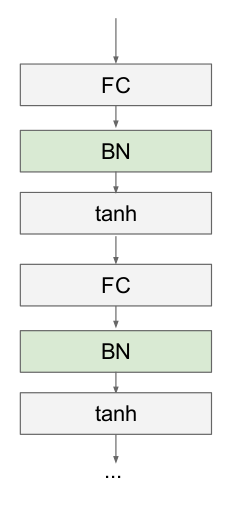

# Системы логирования

Наиболее популярные:
* [Weights&Biases](https://docs.wandb.ai/): [c чего начать](https://colab.research.google.com/github/wandb/examples/blob/master/colabs/intro/Intro_to_Weights_%26_Biases.ipynb)
* [Tensorboard](https://www.tensorflow.org/tensorboard): [пример использования](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/get_started.ipynb), [как подружить с ноутбуками](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/tensorboard_in_notebooks.ipynb)
* [MLFlow](https://mlflow.org/)

## Подбор гиперпараметров

В целом, алгоритм заключается примерно в следующем:

1: Check initial loss

2: Overfit a small sample

3: Find LR that makes loss go down

4: Coarse grid, train for ~1-5 epochs

5: Refine grid, train longer

6: Look at loss and accuracy curves

### Наблюдаем за loss и метриками:



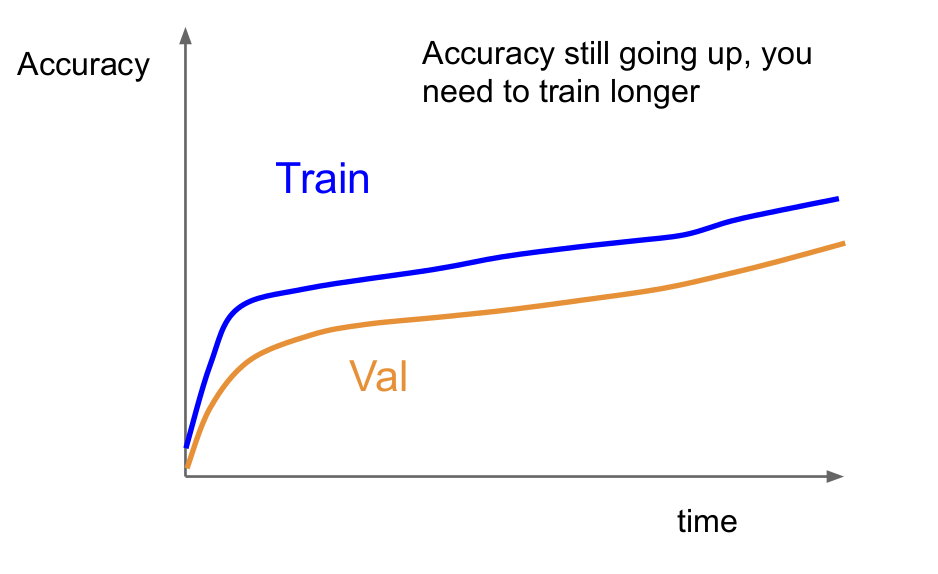

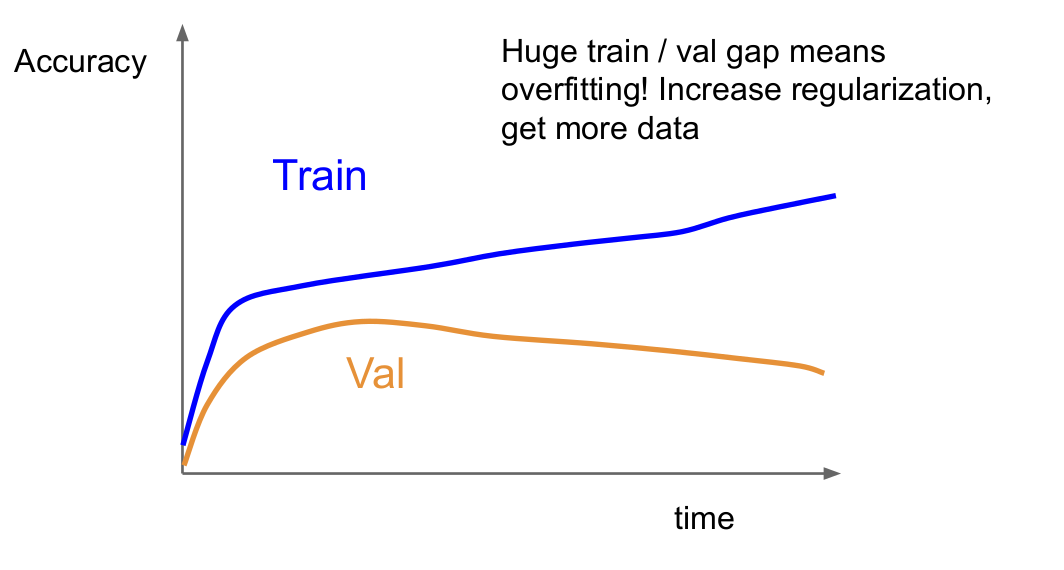

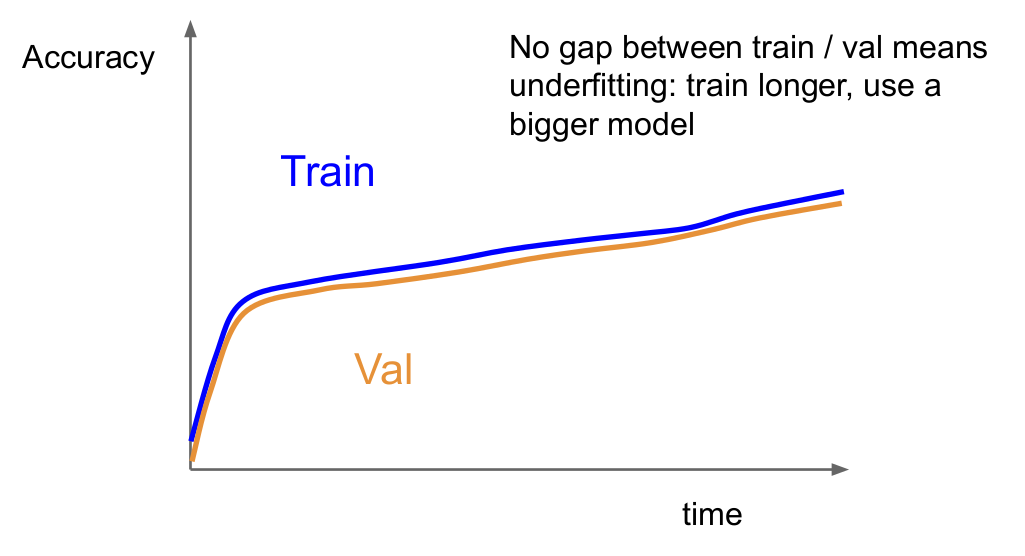

In [86]:
import os
import gzip
from typing import Tuple

import numpy as np

import torch
import torchvision
from torch import nn

from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from torch.utils.tensorboard import SummaryWriter
from tqdm.notebook import tqdm

In [78]:
%load_ext tensorboard

In [79]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [145]:
class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_shape: Tuple[int, int] = (28, 28), num_of_classes: int = 10):
        super(FullyConnectedNetwork, self).__init__()

        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape[0] * input_shape[1], 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, num_of_classes),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
model = FullyConnectedNetwork()
model.to(device)

In [147]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [148]:
training_data = torchvision.datasets.FashionMNIST(
    root="datasets",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = torchvision.datasets.FashionMNIST(
    root="datasets",
    train=False,
    download=True,
    transform=ToTensor()
)

In [149]:
batch_size = 64
learning_rate = 0.01

In [150]:
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [151]:
loss_fn = nn.CrossEntropyLoss()

In [152]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [153]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch_n, device, summary_writer):
    len_of_dataset = len(dataloader.dataset)
    batch_size = dataloader.batch_size
    num_batches = len(dataloader)

    train_loss, train_accuracy = 0, 0
    model.train()
    with tqdm(dataloader, unit='batch') as tepoch:
        for images, labels in tepoch:

            # Определяем описание для tqdm
            tepoch.set_description(f'Epoch {epoch_n}')

            images, labels = images.to(device), labels.to(device)
            # Делаем forward pass
            pred = model(images)
            # вычисляем loss
            loss = loss_fn(pred, labels)

            # Вычисляем градиенты
            optimizer.zero_grad()
            loss.backward()

            # Делаем шаг оптимизатора
            optimizer.step()

            # Вычисляем количество правильных ответов
            correct = (pred.argmax(1) == labels).sum().item()
            accuracy = correct / batch_size

            # Прибавляем loss и accuracy к полным значениям за эпоху
            train_loss += loss.item()
            train_accuracy += correct
            # Выводим в tqdm текущие лосс и точность
            tepoch.set_postfix(loss=loss.item(), accuracy=accuracy)

    # вычисляем среднее
    train_loss /= num_batches
    train_accuracy /= len_of_dataset

    # Записываем в тензорборд
    summary_writer.add_scalar(
        'train/loss',
        train_loss,
        epoch_n
    )

    summary_writer.add_scalar(
        'train/accuracy',
        train_accuracy,
        epoch_n
    )


In [154]:
def test_loop(dataloader, model, loss_fn, epoch_n,  device, summary_writer):
    len_of_dataset = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()
    # На этапе валидации нам не нужно вычислять градиенты
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            pred = model(images)
            test_loss += loss_fn(pred, labels).item()
            correct += (pred.argmax(1) == labels).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= len_of_dataset

    summary_writer.add_scalar(
        'test/loss',
        test_loss,
        epoch_n
    )

    summary_writer.add_scalar(
        'test/accuracy',
        correct,
        epoch_n
    )
    print(f'Test Metrics: \n Accuracy: {(correct):>0.3f}, Avg loss: {test_loss:>8f} \n')

In [ ]:
%tensorboard --logdir runs/first_experiment

In [ ]:
num_of_epochs = 10

writer = SummaryWriter('runs/first_experiment')


for epoch_n in range(num_of_epochs):
    train_loop(train_dataloader, model, loss_fn, optimizer, epoch_n, device, writer)
    test_loop(test_dataloader, model, loss_fn, epoch_n, device, writer)
print("Done!")